In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
from config import weather_api_key
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1 
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+") 
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | phatthalung
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | wuwei
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | abu samrah
Processing Record 10 of Set 1 | urucurituba
Processing Record 11 of Set 1 | najran
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | southbridge
Processing Record 16 of Set 1 | baiquan
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | pabianice
Processing Record 22 of Set 1 | saskylakh
Processing Record 23 of 

Processing Record 36 of Set 4 | vilhena
Processing Record 37 of Set 4 | east london
Processing Record 38 of Set 4 | san patricio
Processing Record 39 of Set 4 | avarua
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | ponto novo
Processing Record 45 of Set 4 | hailun
Processing Record 46 of Set 4 | oga
Processing Record 47 of Set 4 | ajdabiya
Processing Record 48 of Set 4 | praia da vitoria
Processing Record 49 of Set 4 | portland
Processing Record 50 of Set 4 | talnakh
Processing Record 1 of Set 5 | umm kaddadah
Processing Record 2 of Set 5 | natchitoches
Processing Record 3 of Set 5 | privokzalnyy
City not found. Skipping...
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | kokuy
Processing Record 6 of Set 5 | farafangana
Pr

Processing Record 24 of Set 8 | georgiyevka
Processing Record 25 of Set 8 | shimanovsk
Processing Record 26 of Set 8 | port macquarie
Processing Record 27 of Set 8 | pavino
Processing Record 28 of Set 8 | le vauclin
Processing Record 29 of Set 8 | solwezi
Processing Record 30 of Set 8 | bisira
Processing Record 31 of Set 8 | cascais
Processing Record 32 of Set 8 | airai
Processing Record 33 of Set 8 | mirabad
Processing Record 34 of Set 8 | mount gambier
Processing Record 35 of Set 8 | biak
Processing Record 36 of Set 8 | coihaique
Processing Record 37 of Set 8 | norman wells
Processing Record 38 of Set 8 | talaya
Processing Record 39 of Set 8 | dharchula
Processing Record 40 of Set 8 | pokrovsk
Processing Record 41 of Set 8 | tucuma
Processing Record 42 of Set 8 | naze
Processing Record 43 of Set 8 | teguldet
Processing Record 44 of Set 8 | botou
Processing Record 45 of Set 8 | nelson bay
Processing Record 46 of Set 8 | wanning
Processing Record 47 of Set 8 | mayumba
Processing Record

Processing Record 16 of Set 12 | puerto cabezas
Processing Record 17 of Set 12 | safranbolu
Processing Record 18 of Set 12 | mashhad
Processing Record 19 of Set 12 | mineiros
Processing Record 20 of Set 12 | tual
Processing Record 21 of Set 12 | neustadt
Processing Record 22 of Set 12 | oksfjord
Processing Record 23 of Set 12 | meyungs
City not found. Skipping...
Processing Record 24 of Set 12 | bahia blanca
Processing Record 25 of Set 12 | banjar
Processing Record 26 of Set 12 | ust-kuyga
Processing Record 27 of Set 12 | maningrida
Processing Record 28 of Set 12 | mattru
Processing Record 29 of Set 12 | tateyama
Processing Record 30 of Set 12 | nanortalik
Processing Record 31 of Set 12 | saint-georges
Processing Record 32 of Set 12 | muriti
Processing Record 33 of Set 12 | raudeberg
Processing Record 34 of Set 12 | kanniyakumari
Processing Record 35 of Set 12 | george town
Processing Record 36 of Set 12 | sao lourenco do sul
Processing Record 37 of Set 12 | semporna
Processing Record 

In [7]:
len(city_data)

584

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Phatthalung,7.5000,100.0833,80.82,81,100,7.34,TH,2021-05-24 14:10:15
1,Busselton,-33.6500,115.3333,48.09,66,98,7.49,AU,2021-05-24 14:10:15
2,Bredasdorp,-34.5322,20.0403,65.28,67,100,4.97,ZA,2021-05-24 14:10:16
3,Hermanus,-34.4187,19.2345,69.91,67,100,14.63,ZA,2021-05-24 14:10:16
4,Port Lincoln,-34.7333,135.8667,60.40,89,100,18.43,AU,2021-05-24 14:10:16
5,Wuwei,37.9281,102.6414,58.87,21,55,5.59,CN,2021-05-24 14:10:17
6,Albany,42.6001,-73.9662,64.72,44,76,4.92,US,2021-05-24 14:08:23
7,Ancud,-41.8697,-73.8203,51.42,84,100,17.87,CL,2021-05-24 14:10:17
8,Abu Samrah,35.3029,37.1841,81.93,24,11,18.72,SY,2021-05-24 14:10:18
9,Urucurituba,-2.6833,-57.6667,89.29,56,24,4.54,BR,2021-05-24 14:10:18


In [9]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Phatthalung,TH,2021-05-24 14:10:15,7.5000,100.0833,80.82,81,100,7.34
1,Busselton,AU,2021-05-24 14:10:15,-33.6500,115.3333,48.09,66,98,7.49
2,Bredasdorp,ZA,2021-05-24 14:10:16,-34.5322,20.0403,65.28,67,100,4.97
3,Hermanus,ZA,2021-05-24 14:10:16,-34.4187,19.2345,69.91,67,100,14.63
4,Port Lincoln,AU,2021-05-24 14:10:16,-34.7333,135.8667,60.40,89,100,18.43
...,...,...,...,...,...,...,...,...,...
579,Corinto,GR,2021-05-24 14:13:32,37.9407,22.9573,95.85,30,0,1.01
580,Beringovskiy,RU,2021-05-24 14:12:15,63.0500,179.3167,32.74,92,100,11.72
581,Pinega,RU,2021-05-24 14:13:32,64.7001,43.3936,41.54,95,100,8.30
582,Inhambane,MZ,2021-05-24 14:13:33,-23.8650,35.3833,76.98,47,20,6.91


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

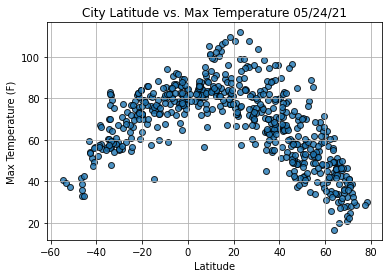

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

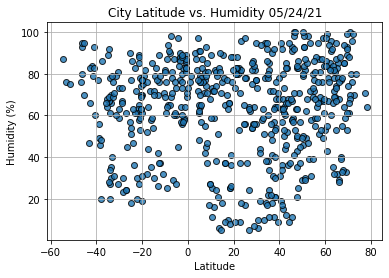

In [14]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

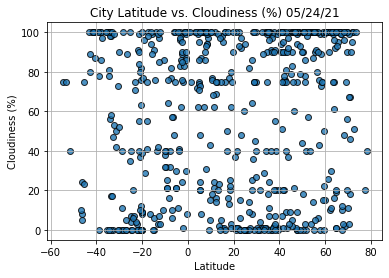

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

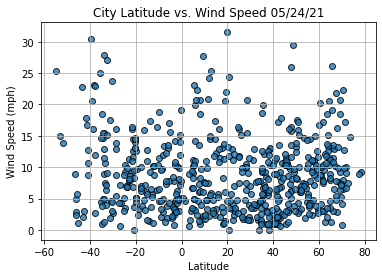

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()